Testing Machine Learning Algorithms for detecting spam.

Using datasets containing samples of spam comments in youtube comments.

ML Algorithms Used:

    -   Logistic Regression 

    -   Multinomial Naive Bayes

    -   Random Forest Classifier

In [1]:
# Standard Library Imports

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Evaluation / Visalisation imports
from sklearn.metrics import classification_report, confusion_matrix, log_loss


In [2]:
# Import and concatinate all the datasets into 1 big dataset (dataFrame)

from glob import glob
ytFiles = glob("Youtube*.csv")
dataFrame = pd.concat([pd.read_csv(f) for f in ytFiles], ignore_index=True)
dataFrame.head(3)


,COMMENT_ID,AUTHOR,DATE,CONTENT,CLASS
0,LZQPQhLyRh80UYxNuaDWhIGQYNQ96IuCg-AYWqNPjpU,Julius NM,2013-11-07T06:20:48,"Huh, anyway check out this you[tube] channel: ...",1
1,LZQPQhLyRh_C2cTtd9MvFRJedxydaVW-2sNg5Diuo4A,adam riyati,2013-11-07T12:37:15,Hey guys check out my new channel and our firs...,1
2,LZQPQhLyRh9MSZYnf8djyk0gEF9BHDPYrrK-qCczIY8,Evgeny Murashkin,2013-11-08T17:34:21,just for test I have to say murdev.com,1


In [3]:
# Pre-processing the dataset: Attain information about the data

print("Dataset Shape:")
dataFrame.shape

Dataset Shape:


(1956, 5)

In [4]:
# Preprocessing the data: look at the general info of the dataset

print("Dataset Info:")
dataFrame.info()


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1956 entries, 0 to 1955
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   COMMENT_ID  1956 non-null   object
 1   AUTHOR      1956 non-null   object
 2   DATE        1711 non-null   object
 3   CONTENT     1956 non-null   object
 4   CLASS       1956 non-null   int64 
dtypes: int64(1), object(4)
memory usage: 76.5+ KB


In [5]:
# Check for any null values / missing values

print("Checking for null Values:")
dataFrame.isnull().any()


Checking for null Values:


COMMENT_ID    False
AUTHOR        False
DATE           True
CONTENT       False
CLASS         False
dtype: bool

In [6]:
# Check for Duplicate Rows

print("Duplicate rows:", dataFrame.duplicated().sum())


Duplicate rows: 3


In [7]:
# Remove any duplicate rows

dataFrame = dataFrame.drop_duplicates()

# Confirm no more duplicates
print("After removal:", dataFrame.duplicated().sum())

After removal: 0


In [8]:
# Our main focus from the dataset will be the content and class
# Spliting the two into training and test data

print(dataFrame[['CONTENT', 'CLASS']].head())
x = dataFrame['CONTENT']        # Dependent variable
y = dataFrame['CLASS']          # Control variable
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.25, random_state=0, stratify=y)


                                             CONTENT  CLASS
0  Huh, anyway check out this you[tube] channel: ...      1
1  Hey guys check out my new channel and our firs...      1
2             just for test I have to say murdev.com      1
3   me shaking my sexy ass on my channel enjoy ^_^ ﻿      1
4            watch?v=vtaRGgvGtWQ   Check this out .﻿      1


In [9]:
# Text vectorization 
# Allows the detection of patterns in word usage to distingish spam messages 

from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(stop_words='english', max_df=0.7)
x_train_vec = vectorizer.fit_transform(x_train)
x_test_vec = vectorizer.transform(x_test)


1st ML Algorithm: Logistic Regression

In [10]:
# Implementation of Logistic Regression

from sklearn.linear_model import LogisticRegression
modelLR = LogisticRegression(max_iter=1000)
modelLR.fit(x_train_vec, y_train)
y_predLR = modelLR.predict(x_test_vec)


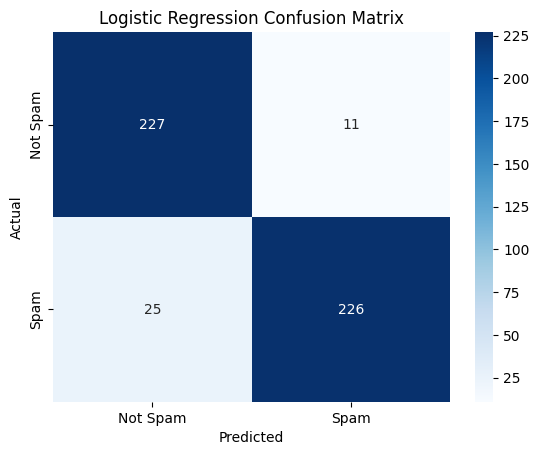


Logistic Regression Classification Report: 
              precision  recall  f1-score  support
0                  0.90    0.95      0.93   238.00
1                  0.95    0.90      0.93   251.00
accuracy           0.93    0.93      0.93     0.93
macro avg          0.93    0.93      0.93   489.00
weighted avg       0.93    0.93      0.93   489.00

Log Loss: 0.2834878466135979


In [11]:

# Visualise results:

# Confusion Matrix
cm = confusion_matrix(y_test, y_predLR)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Spam', 'Spam'], yticklabels=['Not Spam', 'Spam'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Logistic Regression Confusion Matrix')
plt.show()

# Classification Report
clReport = classification_report(y_test, y_predLR, output_dict=True)
print("\nLogistic Regression Classification Report: ")
print(pd.DataFrame(clReport).transpose().round(2))

# Log Loss - quantifing the difference between predicted and actual values: the closser to 0, the better
loss = log_loss(y_test, modelLR.predict_proba(x_test_vec))
print("\nLog Loss:", loss)


2nd ML Algorithm: Multinomial Naive Bayes

In [12]:
# Implementation of Multinomial Naive Bayes

from sklearn.naive_bayes import MultinomialNB
modelMNB = MultinomialNB()
modelMNB.fit(x_train_vec, y_train)
y_predMNB = modelMNB.predict(x_test_vec)


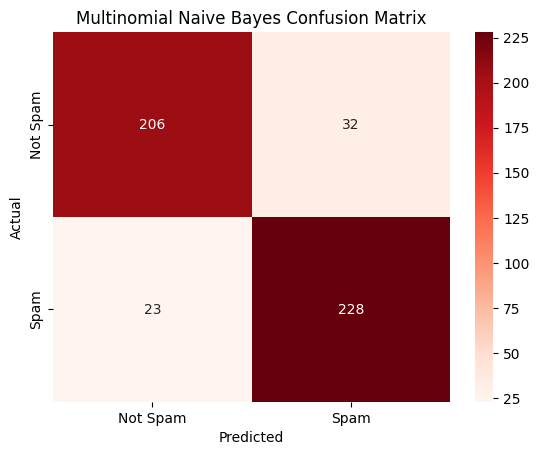


Multinomial Naive Bayes Classification Report: 
              precision  recall  f1-score  support
0                  0.90    0.87      0.88   238.00
1                  0.88    0.91      0.89   251.00
accuracy           0.89    0.89      0.89     0.89
macro avg          0.89    0.89      0.89   489.00
weighted avg       0.89    0.89      0.89   489.00

Log Loss: 0.2816381950774678


In [13]:

# Visualise results:

# Confusion Matrix
cm = confusion_matrix(y_test, y_predMNB)
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds', xticklabels=['Not Spam', 'Spam'], yticklabels=['Not Spam', 'Spam'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Multinomial Naive Bayes Confusion Matrix')
plt.show()

# Classification Report
clReport = classification_report(y_test, y_predMNB, output_dict=True)
print("\nMultinomial Naive Bayes Classification Report: ")
print(pd.DataFrame(clReport).transpose().round(2))

# Log Loss - quantifing the difference between predicted and actual values: the closser to 0, the better
loss = log_loss(y_test, modelMNB.predict_proba(x_test_vec))
print("\nLog Loss:", loss)


3rd ML Algorithm: Random Forest Classifier

In [14]:
# Implementation of Random Forest Classifier

from sklearn.ensemble import RandomForestClassifier
modelRndFC = RandomForestClassifier(n_estimators=100, random_state=42)
modelRndFC.fit(x_train_vec, y_train)
y_predRndFC = modelRndFC.predict(x_test_vec)


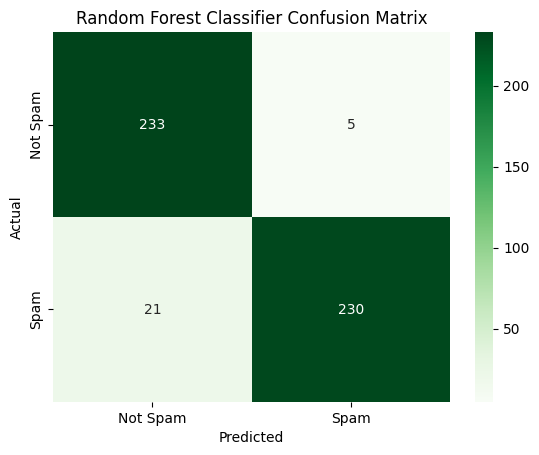


Random Forest Classifier Classification Report: 
              precision  recall  f1-score  support
0                  0.92    0.98      0.95   238.00
1                  0.98    0.92      0.95   251.00
accuracy           0.95    0.95      0.95     0.95
macro avg          0.95    0.95      0.95   489.00
weighted avg       0.95    0.95      0.95   489.00

Log Loss: 0.5153211858699165


In [15]:

# Visualise results:

# Confusion Matrix
cm = confusion_matrix(y_test, y_predRndFC)
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', xticklabels=['Not Spam', 'Spam'], yticklabels=['Not Spam', 'Spam'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Random Forest Classifier Confusion Matrix')
plt.show()

# Classification Report
clReport = classification_report(y_test, y_predRndFC, output_dict=True)
print("\nRandom Forest Classifier Classification Report: ")
print(pd.DataFrame(clReport).transpose().round(2))

# Log Loss - quantifing the difference between predicted and actual values: the closser to 0, the better
loss = log_loss(y_test, modelRndFC.predict_proba(x_test_vec))
print("\nLog Loss:", loss)

ROC Curve for comparison between all models

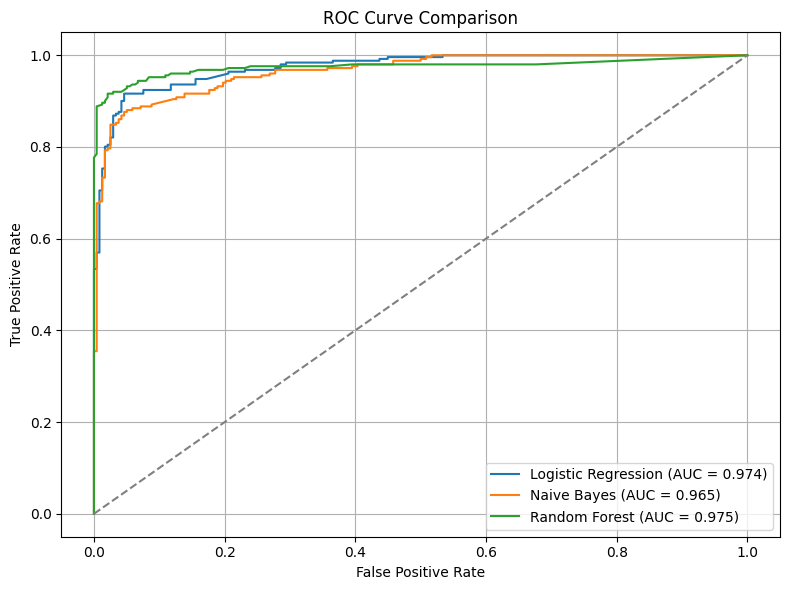

In [16]:
# ROC Curve Implementation 

from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

roc_data = {}

# Initialise all models
y_prob_LR = modelLR.predict_proba(x_test_vec)[:, 1]         # Logistic Regression
fpr_LR, tpr_LR, _ = roc_curve(y_test, y_prob_LR)
roc_auc_LR = auc(fpr_LR, tpr_LR)

y_prob_NB = modelMNB.predict_proba(x_test_vec)[:, 1]        # Multinomial Naive Bayes
fpr_NB, tpr_NB, _ = roc_curve(y_test, y_prob_NB)
roc_auc_NB = auc(fpr_NB, tpr_NB)

y_prob_RndFC = modelRndFC.predict_proba(x_test_vec)[:, 1]   # Random Forest Classifier
fpr_RndFC, tpr_RndFC, _ = roc_curve(y_test, y_prob_RndFC)
roc_auc_RndFC = auc(fpr_RndFC, tpr_RndFC)

# Plot the ROC curve
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.plot(fpr_LR, tpr_LR, label=f'Logistic Regression (AUC = {roc_auc_LR:.3f})')     # LR
plt.plot(fpr_NB, tpr_NB, label=f'Naive Bayes (AUC = {roc_auc_NB:.3f})')             # NB
plt.plot(fpr_RndFC, tpr_RndFC, label=f'Random Forest (AUC = {roc_auc_RndFC:.3f})')  # RndFC

plt.plot([0, 1], [0, 1], linestyle='--', color='gray')  # Line of Reference
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()

Machine Learning Models Bar Chart Comparison

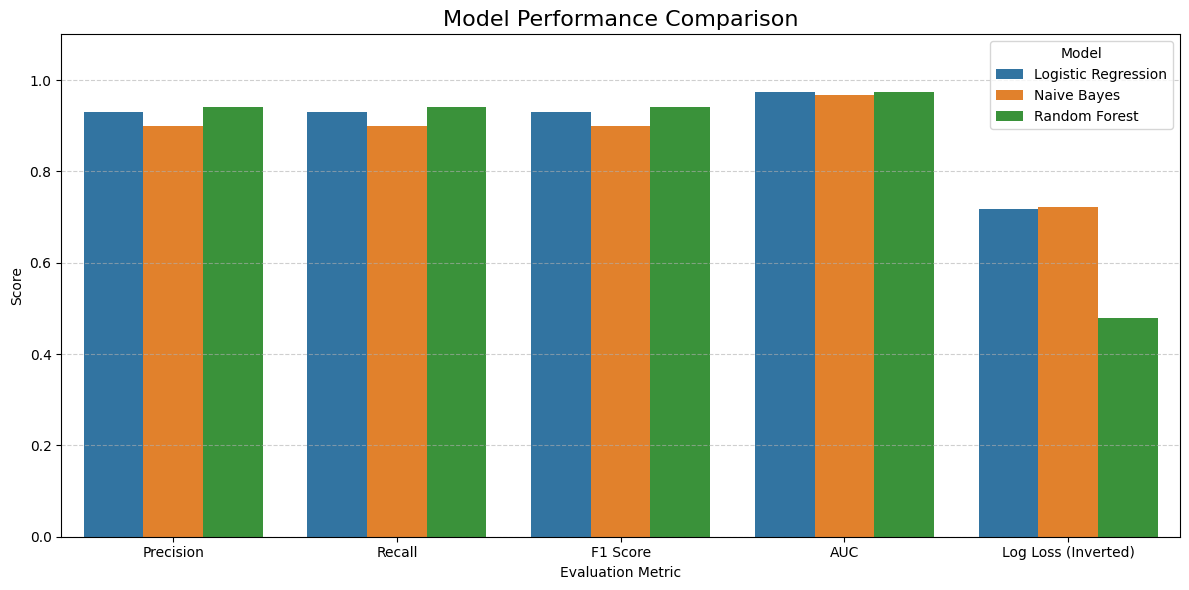

In [17]:
# Summary of evaluation metrics
summaryOfAllData = {
    'Model': ['Logistic Regression', 'Naive Bayes', 'Random Forest'],
    'Precision': [0.93, 0.90, 0.94],
    'Recall': [0.93, 0.90, 0.94],
    'F1 Score': [0.93, 0.90, 0.94],
    'AUC': [0.974, 0.968, 0.974],
    'Log Loss (Inverted)': [1 - 0.2825, 1 - 0.2782, 1 - 0.5214]  # lower log loss is better, so we invert for clarity
}

# Convert to DataFrame
summaryDataFrame = pd.DataFrame(summaryOfAllData)

# Melt for seaborn plotting
melted_df = summaryDataFrame.melt(id_vars='Model', var_name='Metric', value_name='Score')

# Set up plot
plt.figure(figsize=(12, 6))
sns.barplot(data=melted_df, x='Metric', y='Score', hue='Model')
plt.title('Model Performance Comparison', fontsize=16)
plt.ylim(0, 1.1)
plt.ylabel('Score')
plt.xlabel('Evaluation Metric')
plt.legend(title='Model')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

Tuning models to improve performance

1. Tuning Random Forest Classification 

In [18]:
# Improving Random Forrest Classifier

from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Create the pipeline
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(stop_words='english')),
    ('rf', RandomForestClassifier(random_state=42))
])

# Hyperparameter grid
param_grid = {
    'tfidf__max_df': [0.75, 1.0],
    'tfidf__min_df': [1, 3],
    'tfidf__ngram_range': [(1,1), (1,2)],
    'rf__n_estimators': [100, 200],
    'rf__max_depth': [None, 10, 20],
    'rf__min_samples_split': [2, 5],
    'rf__min_samples_leaf': [1, 2],
    'rf__max_features': ['sqrt', 'log2']
}

# GridSearchCV setup
gridRFC = GridSearchCV(
    pipeline,
    param_grid,
    cv=5,
    scoring='neg_log_loss',  # Note: GridSearch maximizes score, so log_loss is negative
    verbose=2,
    n_jobs=-1
)

# Fit the model
gridRFC.fit(x_train, y_train)

# Show best config and corresponding score
print("Best Parameters:", gridRFC.best_params_)
print("Best Log Loss:", -gridRFC.best_score_)  # Negate to get actual log loss


Fitting 5 folds for each of 384 candidates, totalling 1920 fits
Best Parameters: {'rf__max_depth': None, 'rf__max_features': 'sqrt', 'rf__min_samples_leaf': 2, 'rf__min_samples_split': 2, 'rf__n_estimators': 200, 'tfidf__max_df': 0.75, 'tfidf__min_df': 3, 'tfidf__ngram_range': (1, 2)}
Best Log Loss: 0.17103767563182928


Log Loss (Test): 0.19807167143009588
Accuracy: 0.9406952965235174
Precision: 0.9625
Recall: 0.9203187250996016
F1 Score: 0.9409368635437881

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.96      0.94       238
           1       0.96      0.92      0.94       251

    accuracy                           0.94       489
   macro avg       0.94      0.94      0.94       489
weighted avg       0.94      0.94      0.94       489



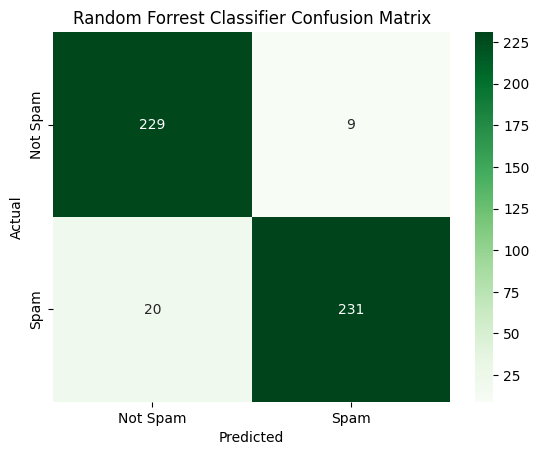

In [19]:
# Evaluting the best model on test set 
from sklearn.metrics import log_loss, accuracy_score, precision_score, recall_score, f1_score

# Predict probabilities and labels on test set
y_proba = gridRFC.predict_proba(x_test)
y_pred = gridRFC.predict(x_test)

# Metrics
print("Log Loss (Test):", log_loss(y_test, y_proba))
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))

print("\nClassification Report:\n", classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', xticklabels=['Not Spam', 'Spam'], yticklabels=['Not Spam', 'Spam'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Random Forrest Classifier Confusion Matrix')
plt.show()


2. Tuning Logistic Regression

In [20]:
# Improving Logistic Regression

# Pipeline
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(stop_words='english')),
    ('lr', LogisticRegression(max_iter=1000, random_state=42))
])

# Grid for regularization tuning
param_grid = {
    'tfidf__max_df': [0.75],
    'tfidf__min_df': [1],
    'tfidf__ngram_range': [(1,2)],
    'lr__C': [0.001, 0.01, 0.1, 1, 10, 100],  # Wider range of regularization
    'lr__penalty': ['l1', 'l2'],
    'lr__solver': ['liblinear'],  # Supports both l1 and l2
}

# GridSearchCV
gridLR = GridSearchCV(
    pipeline,
    param_grid,
    cv=5,
    scoring='neg_log_loss',
    verbose=2,
    n_jobs=-1
)

# Fit
gridLR.fit(x_train, y_train)

# Output
print("Best Parameters:", gridLR.best_params_)
print("Best Log Loss:", -gridLR.best_score_)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
Best Parameters: {'lr__C': 100, 'lr__penalty': 'l2', 'lr__solver': 'liblinear', 'tfidf__max_df': 0.75, 'tfidf__min_df': 1, 'tfidf__ngram_range': (1, 2)}
Best Log Loss: 0.13279410374231346


Test Log Loss: 0.16952468430021392
Accuracy: 0.9447852760736196
Precision: 0.9666666666666667
Recall: 0.9243027888446215
F1 Score: 0.945010183299389

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.97      0.94       238
           1       0.97      0.92      0.95       251

    accuracy                           0.94       489
   macro avg       0.95      0.95      0.94       489
weighted avg       0.95      0.94      0.94       489



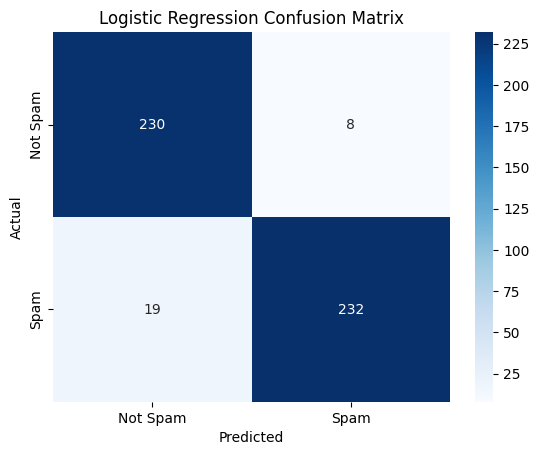

In [21]:
# Evaluating the best model on test set
# Predict
y_proba = gridLR.predict_proba(x_test)
y_pred = gridLR.predict(x_test)

# Metrics
print("Test Log Loss:", log_loss(y_test, y_proba))
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))

print("\nClassification Report:\n", classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Spam', 'Spam'], yticklabels=['Not Spam', 'Spam'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Logistic Regression Confusion Matrix')
plt.show()


3. Tuning Multinomial Naive Bayes

In [22]:
# Improving Multinomial Naive Bayes

# Pipeline
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(stop_words='english')),
    ('nb', MultinomialNB())
])

# Hyperparameter grid
param_grid = {
    'tfidf__max_df': [0.75],
    'tfidf__min_df': [1],
    'tfidf__ngram_range': [(1,1), (1,2)],
    'nb__alpha': [0.1, 0.5, 1.0, 5.0, 10.0]
}

# Grid search
gridMNB = GridSearchCV(
    pipeline,
    param_grid,
    cv=5,
    scoring='neg_log_loss',
    verbose=2,
    n_jobs=-1
)

# Fit
gridMNB.fit(x_train, y_train)

# Output
print("Best Parameters:", gridMNB.best_params_)
print("Best Log Loss:", -gridMNB.best_score_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best Parameters: {'nb__alpha': 0.1, 'tfidf__max_df': 0.75, 'tfidf__min_df': 1, 'tfidf__ngram_range': (1, 2)}
Best Log Loss: 0.20518985263794934


Test Log Loss: 0.24454720634489407
Accuracy: 0.8895705521472392
Precision: 0.8832684824902723
Recall: 0.9043824701195219
F1 Score: 0.8937007874015748

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.87      0.89       238
           1       0.88      0.90      0.89       251

    accuracy                           0.89       489
   macro avg       0.89      0.89      0.89       489
weighted avg       0.89      0.89      0.89       489



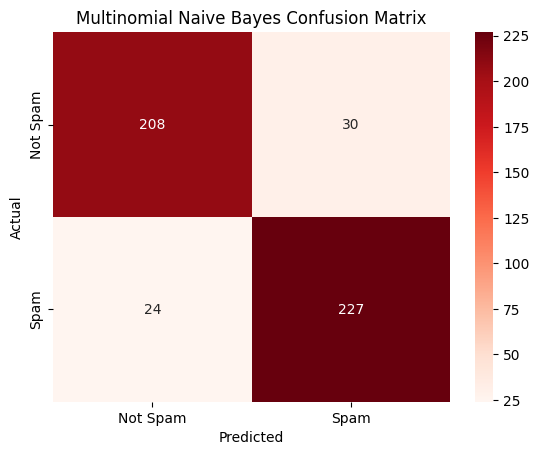

In [23]:
# Evaluating the best model on test set
# Predict
y_proba = gridMNB.predict_proba(x_test)
y_pred = gridMNB.predict(x_test)

# Metrics
print("Test Log Loss:", log_loss(y_test, y_proba))
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))

print("\nClassification Report:\n", classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds', xticklabels=['Not Spam', 'Spam'], yticklabels=['Not Spam', 'Spam'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Multinomial Naive Bayes Confusion Matrix')
plt.show()
